In [31]:
#Montgomery College - DATA ANALYTICS PRACTITIONER Course
##FINAL PROJECT
###DAP using python(covid-19 dataset)


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
#/kaggle/input/corona-virus-report/country_wise_latest.csv
#/kaggle/input/corona-virus-report/day_wise.csv
#/kaggle/input/corona-virus-report/usa_county_wise.csv
#/kaggle/input/corona-virus-report/worldometer_data.csv
#/kaggle/input/corona-virus-report/full_grouped.csv

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Dataframe of country_wise_dataset:
df = pd.read_csv('country_wise_latest.csv')
df


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [14]:
df.shape

(187, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [16]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [17]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


Confirmed                    AxesSubplot(0.125,0.11;0.0503247x0.77)
Deaths                     AxesSubplot(0.18539,0.11;0.0503247x0.77)
Recovered                 AxesSubplot(0.245779,0.11;0.0503247x0.77)
Active                    AxesSubplot(0.306169,0.11;0.0503247x0.77)
New cases                 AxesSubplot(0.366558,0.11;0.0503247x0.77)
New deaths                AxesSubplot(0.426948,0.11;0.0503247x0.77)
New recovered             AxesSubplot(0.487338,0.11;0.0503247x0.77)
Deaths / 100 Cases        AxesSubplot(0.547727,0.11;0.0503247x0.77)
Recovered / 100 Cases     AxesSubplot(0.608117,0.11;0.0503247x0.77)
Deaths / 100 Recovered    AxesSubplot(0.668506,0.11;0.0503247x0.77)
Confirmed last week       AxesSubplot(0.728896,0.11;0.0503247x0.77)
1 week change             AxesSubplot(0.789286,0.11;0.0503247x0.77)
1 week % increase         AxesSubplot(0.849675,0.11;0.0503247x0.77)
dtype: object

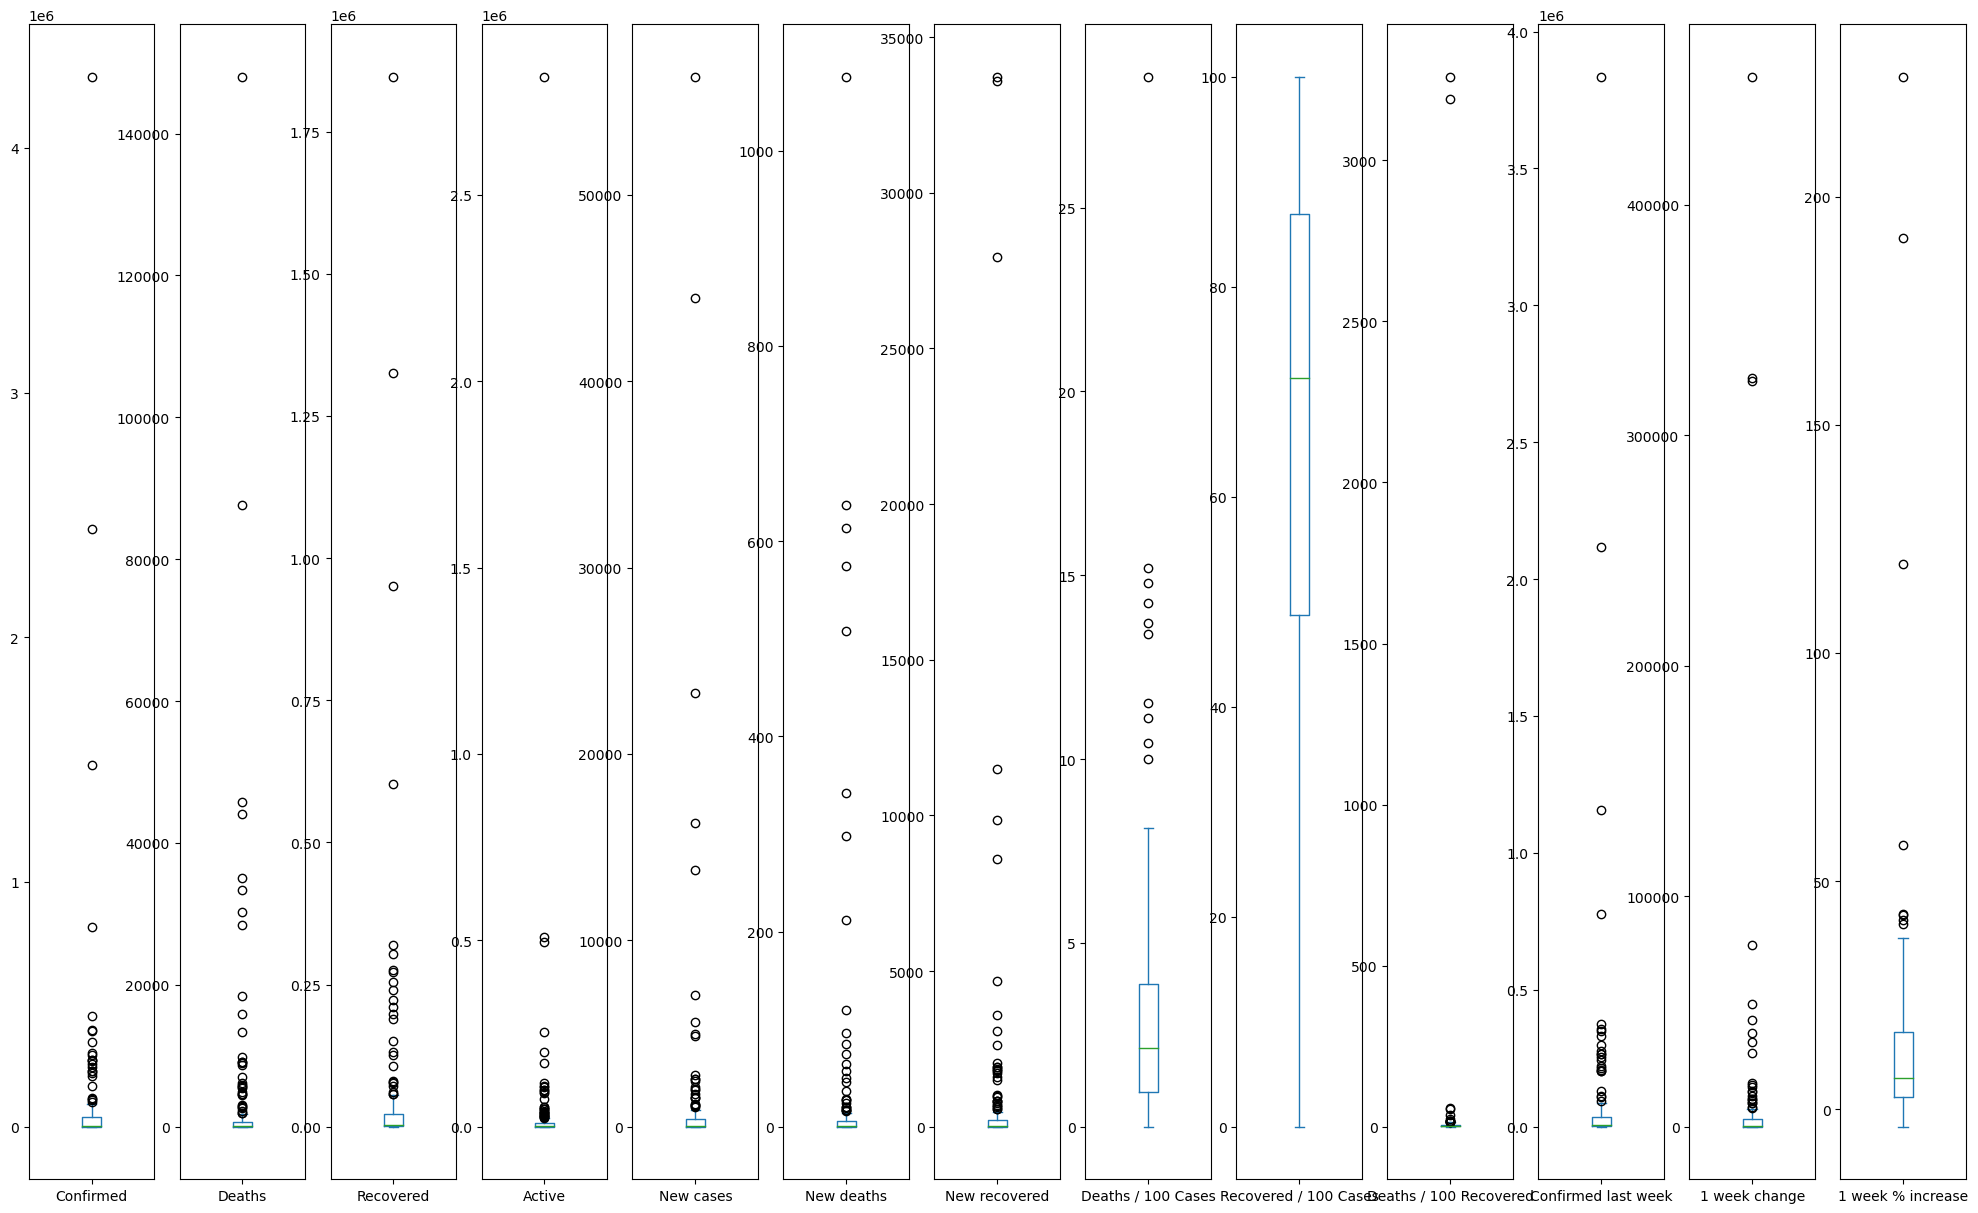

In [19]:
df.plot(kind = 'box', figsize =(25,15), subplots =True)

In [ ]:
# Exploratory Data Analysis

In [20]:
# 10 Countries with most deaths:
DeathCaseinCountries = df[['Country/Region','Deaths']].sort_values(by=['Deaths'],ascending=False).head(10)
DeathCaseinCountries

,Country/Region,Deaths
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112
79,India,33408
61,France,30212
157,Spain,28432
132,Peru,18418
81,Iran,15912


Text(0.5, 1.0, 'Contries with most deaths')

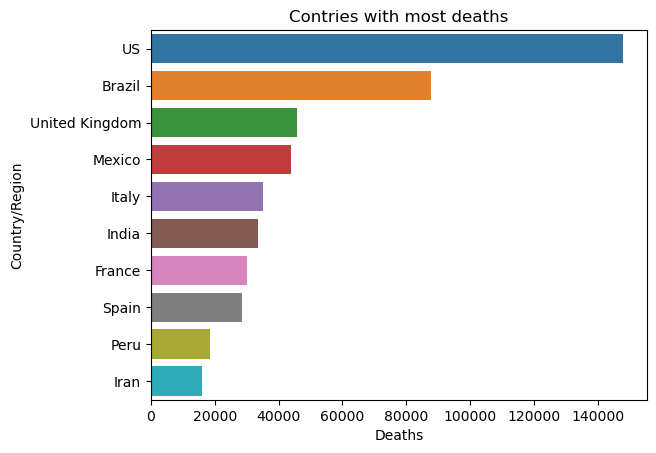

In [21]:
sns.barplot(data=DeathCaseinCountries , y='Country/Region' , x ='Deaths')
plt.title("Contries with most deaths")


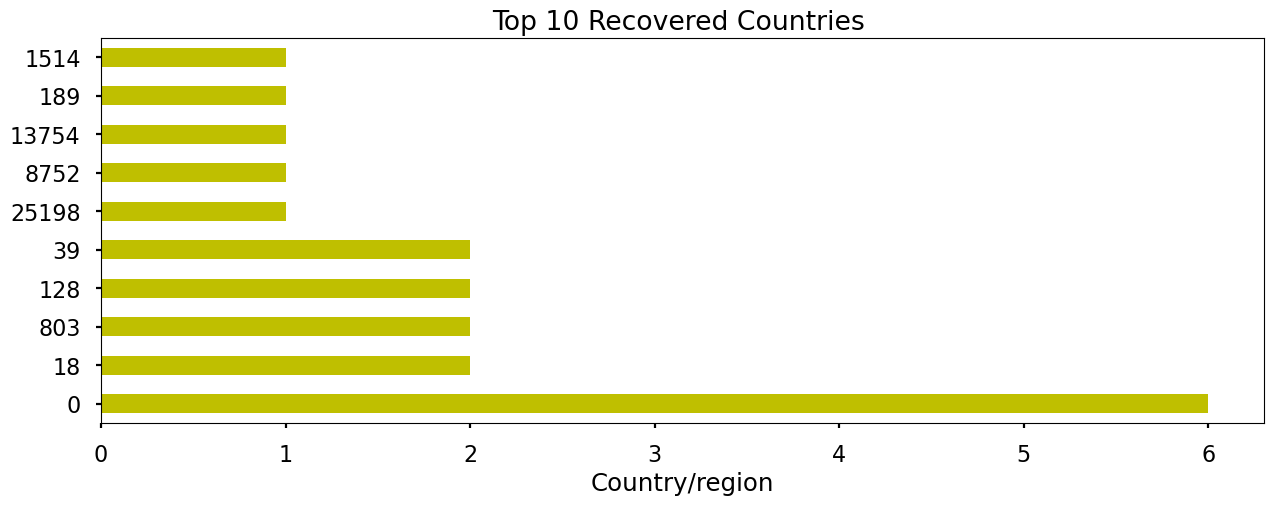

In [7]:
# Most recovered countries :
plt.style.use('seaborn-poster')
plt.figure(figsize=(15,5))
plt.title("Top 10 Recovered Countries ")     
plt.xlabel("Country/region")                          
df["Recovered"].value_counts().head(10).plot(kind="barh",color="y")      
plt.show()

In [27]:
# Active cases :
ActiveCasesinCountries = df[['Country/Region','Active']].sort_values(by=['Active'],ascending=False).head(15)
ActiveCasesinCountries


,Country/Region,Active
173,US,2816444
23,Brazil,508116
79,India,495499
177,United Kingdom,254427
138,Russia,201097
154,South Africa,170537
37,Colombia,117163
61,France,108928
32,Canada,107514
132,Peru,98752


<AxesSubplot:xlabel='Active', ylabel='Country/Region'>

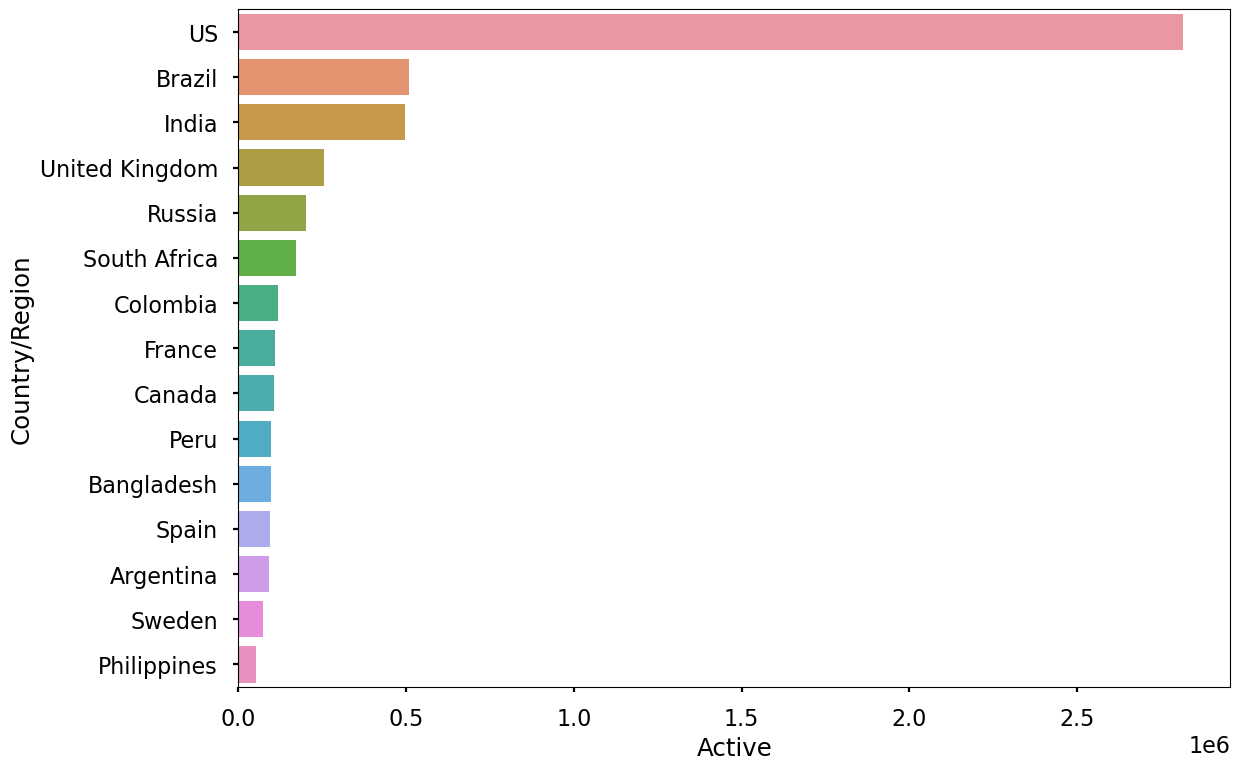

In [28]:
sns.barplot(data =ActiveCasesinCountries , x = 'Active', y ='Country/Region')


<AxesSubplot:>

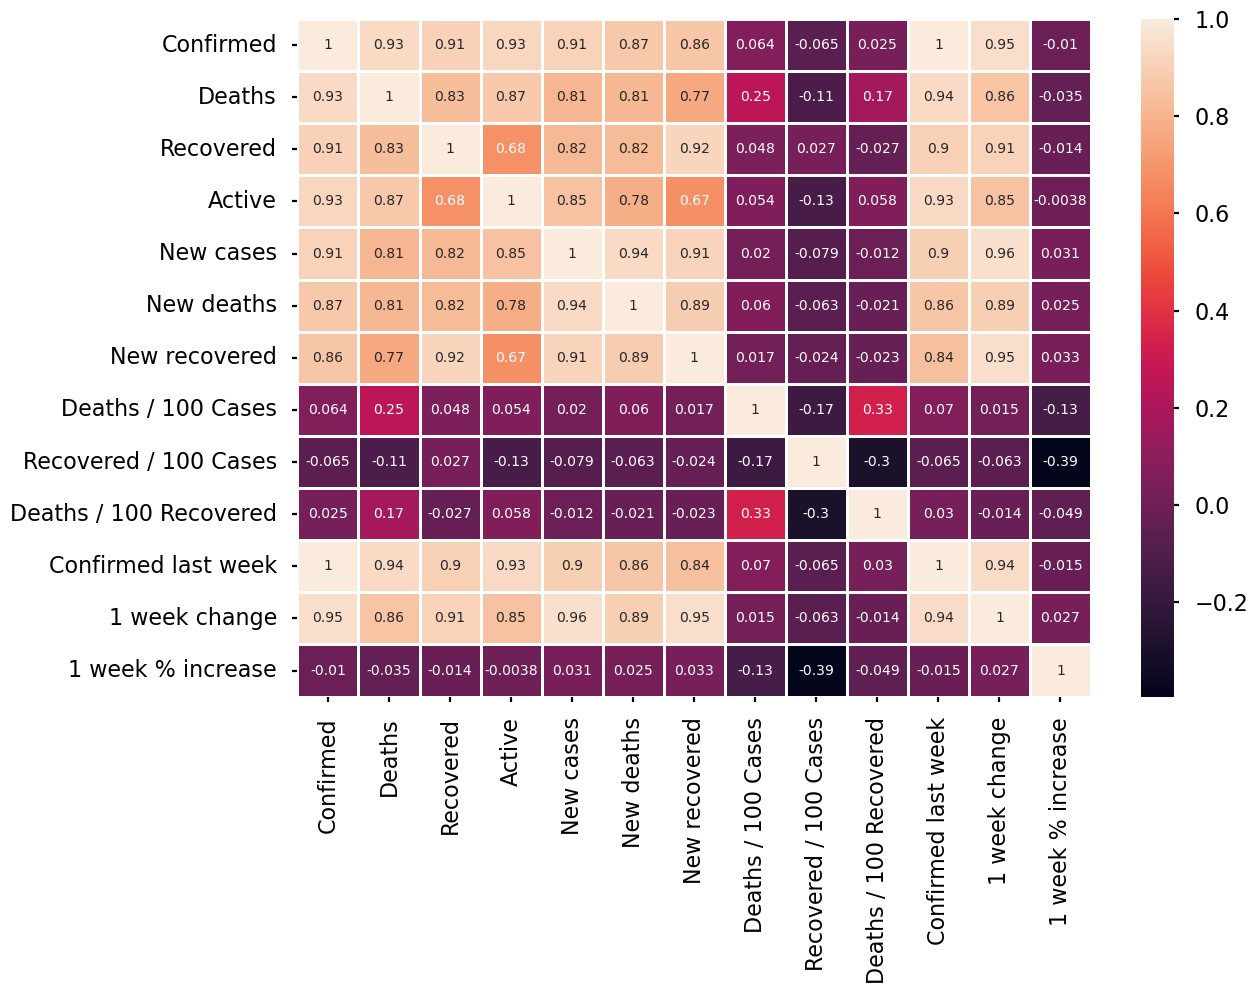

In [29]:
#Heatmap
sns.heatmap(df.corr(),linewidths=2,annot = True)